In [16]:
import tifffile
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil

In [17]:
def clear_folder(folder):
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)
        except Exception as e:
            print('Failed to delete %s. Reason: %s' % (file_path, e))

In [18]:
os.makedirs('../dataset/croped/', exist_ok=True)
os.makedirs('../dataset/croped/masks/', exist_ok=True)
os.makedirs('../dataset/croped/images/', exist_ok=True)
clear_folder('../dataset/croped/masks/')
clear_folder('../dataset/croped/images/')

In [19]:
path = '../dataset/train/'
files = os.listdir(path)

In [24]:
files = [x for x in files if ('.tif' in x and 'mask' not in x)]

In [28]:
def get_patches(img, patch):
    height, width = img.shape[:2]
    if len(img.shape) == 2:
        dy = height % patch
        dx = width % patch
        img = np.pad(img, [(0, dy), (0, dx)], mode='reflect')
        print(img.shape)
    elif len(img.shape) == 3:
        dy = height % patch
        dx = width % patch
        img = np.pad(img, [(0, dy), (0, dx), (0, 0)], mode='reflect')
        print(img.shape)

In [26]:
files

['1e2425f28.tiff',
 'cb2d976f4.tiff',
 '2f6ecfcdf.tiff',
 'aaa6a05cc.tiff',
 '0486052bb.tiff',
 '54f2eec69.tiff',
 'e79de561c.tiff',
 '095bf7a1f.tiff']

In [27]:

patch_size = 1024
for x in files:
    img = tifffile.imread(path + x)
    get_patches(img, 256)
    break

In [29]:
get_patches(img, 256)

(6, 26936, 32220)


In [31]:
img = tifffile.imread(path + x)

In [32]:
img.shape

(3, 26780, 32220)

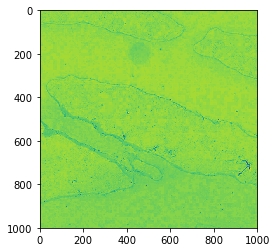

In [37]:
plt.imshow(img[2, 5000:6000,5000:6000])